In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

%matplotlib inline

wine=pd.read_csv('./winequality-red.csv')
print(wine.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

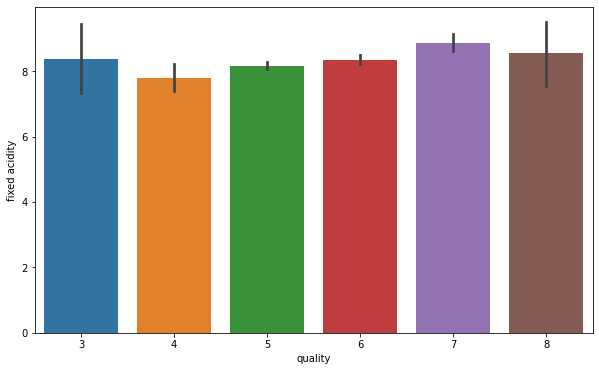

In [32]:
fig=plt.figure(figsize=(10, 6))
sns.barplot(x='quality', y='fixed acidity', data=wine)

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

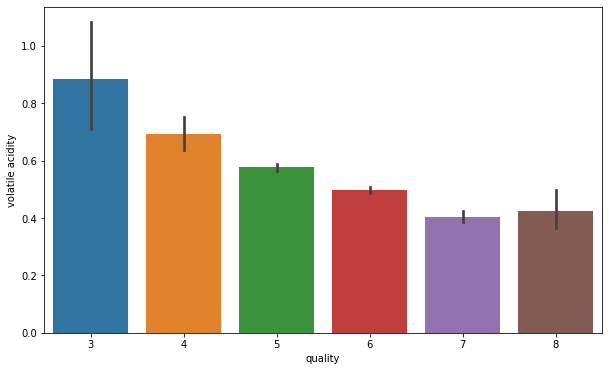

In [33]:
fig=plt.figure(figsize=(10, 6))
sns.barplot(x='quality', y='volatile acidity', data=wine)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

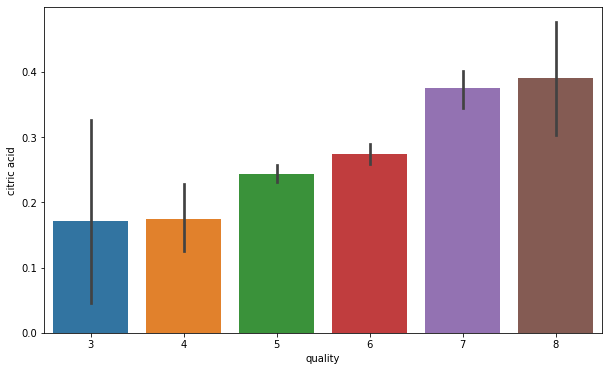

In [34]:
fig=plt.figure(figsize=(10, 6))
sns.barplot(x='quality', y='citric acid', data=wine)

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

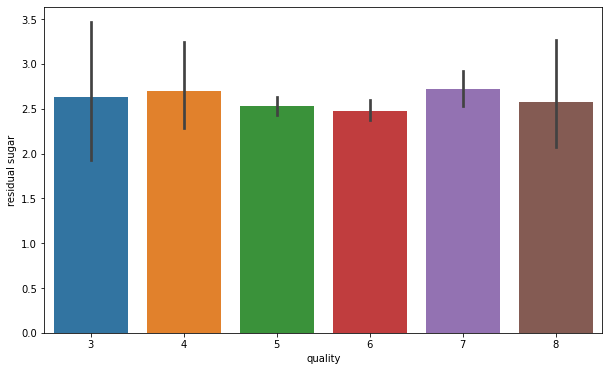

In [35]:
fig=plt.figure(figsize=(10, 6))
sns.barplot(x='quality', y='residual sugar', data=wine)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

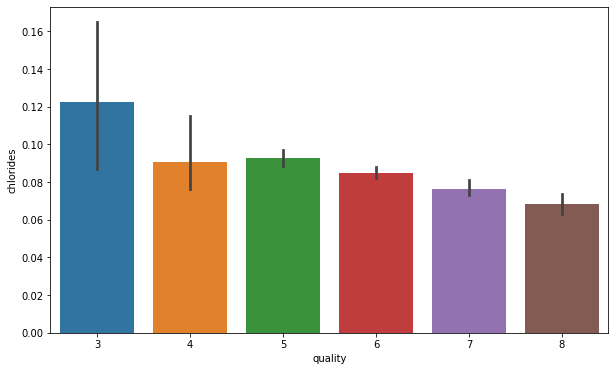

In [36]:
fig=plt.figure(figsize=(10, 6))
sns.barplot(x='quality', y='chlorides', data=wine)

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

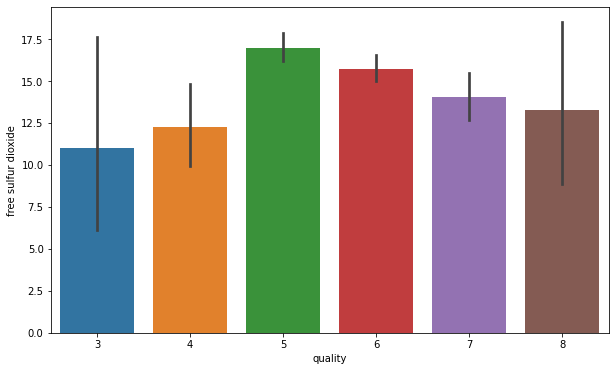

In [37]:
fig=plt.figure(figsize=(10, 6))
sns.barplot(x='quality', y='free sulfur dioxide', data=wine)

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

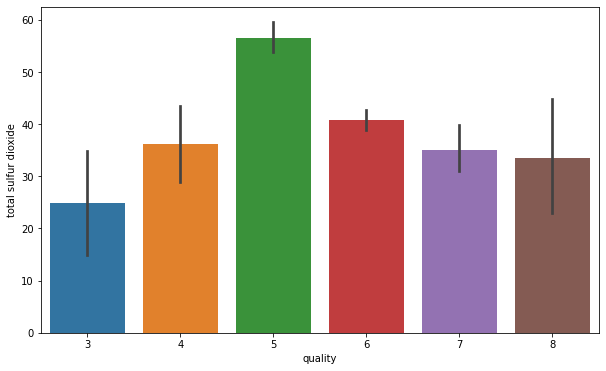

In [38]:
fig=plt.figure(figsize=(10, 6))
sns.barplot(x='quality', y='total sulfur dioxide', data=wine)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

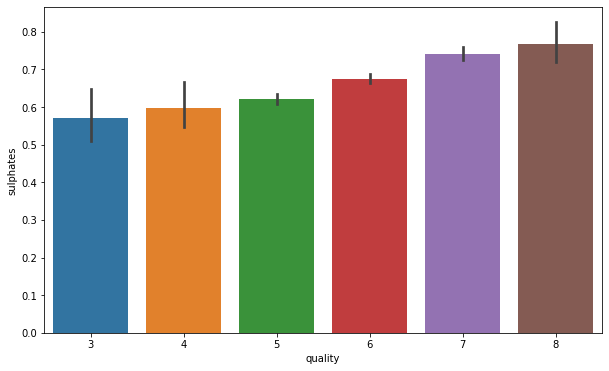

In [39]:
fig=plt.figure(figsize=(10, 6))
sns.barplot(x='quality', y='sulphates', data=wine)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

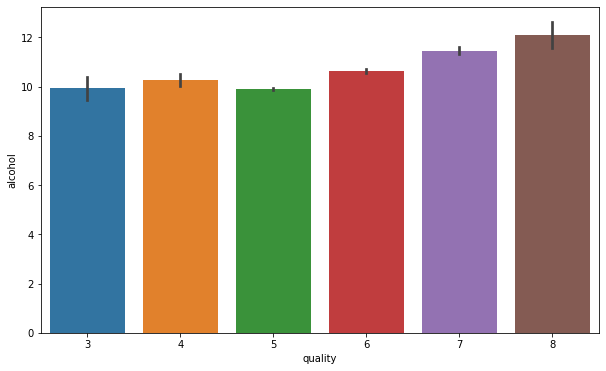

In [40]:
fig=plt.figure(figsize=(10, 6))
sns.barplot(x='quality', y='alcohol', data=wine)

In [41]:
bins=(2, 6.5, 8)
group_names=['bad', 'good']
wine['quality']=pd.cut(wine['quality'], bins=bins, labels=group_names)

In [42]:
encoder=LabelEncoder()
wine.quality=encoder.fit_transform(wine.quality)
wine.quality.value_counts()

0    1382
1     217
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

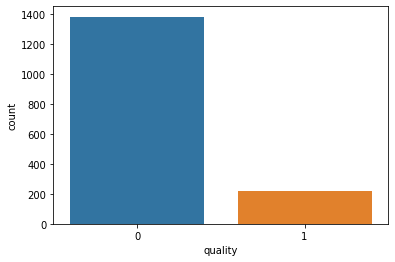

In [43]:
sns.countplot(wine.quality)

In [44]:
X=wine.drop(['quality'], axis=1)
y=wine['quality']

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=sclaer.fit_transform(X_test)

In [46]:
rf_clf=RandomForestClassifier(n_estimators=200)
rf_clf.fit(X_train, y_train)
rf_pred=rf_clf.predict(X_test)
print(classification_report(y_test, rf_pred))
print('\n')
print(confusion_matrix(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       273
           1       0.79      0.40      0.54        47

    accuracy                           0.90       320
   macro avg       0.85      0.69      0.74       320
weighted avg       0.89      0.90      0.88       320



[[268   5]
 [ 28  19]]


In [47]:
sgd=SGDClassifier(penalty=None)
sgd.fit(X_train, y_train)
sgd_pred=sgd.predict(X_test)
print(classification_report(y_test, sgd_pred))
print('\n')
print(confusion_matrix(y_test, sgd_pred))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89       273
           1       0.41      0.57      0.48        47

    accuracy                           0.82       320
   macro avg       0.67      0.72      0.68       320
weighted avg       0.85      0.82      0.83       320



[[234  39]
 [ 20  27]]


In [48]:
svc=SVC()
svc.fit(X_train, y_train)
svc_pred=svc.predict(X_test)
print(classification_report(y_test, svc_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320



In [52]:
param={'C':[0.1, 0.8, 0.9, 1.1, 1.2, 1.3, 1.4], 'kernel':['linear', 'rbf'], 'gamma':[0.1, 0.8, 0.9, 1.1, 1.2, 1.3, 1.4]}

grid_svc=GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.8, 0.9, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [54]:
grid_svc.best_params_

{'C': 1.2, 'gamma': 0.9, 'kernel': 'rbf'}

In [57]:
svc2=SVC(C=1.2, gamma=0.9, kernel='rbf')
svc2.fit(X_train, y_train)
svc2_pred=svc2.predict(X_test)
print(classification_report(y_test, svc2_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       273
           1       0.89      0.34      0.49        47

    accuracy                           0.90       320
   macro avg       0.89      0.67      0.72       320
weighted avg       0.90      0.90      0.88       320



In [58]:
rf_cf_eval=cross_val_score(estimator=rf_clf, X=X_train, y=y_train, cv=10)
rf_cf_eval.mean()

0.9147945374015748